Sometimes we might need to transform images by rotating or resizing them.

For example when you need to pass images to a Machine Learning model so it can classify if it's a cat or a dog, and we want the image to be upright. To optimize the size of images so it doesn't take long to analyze them. Or when we need all the images to have the same proportion before processing them further.

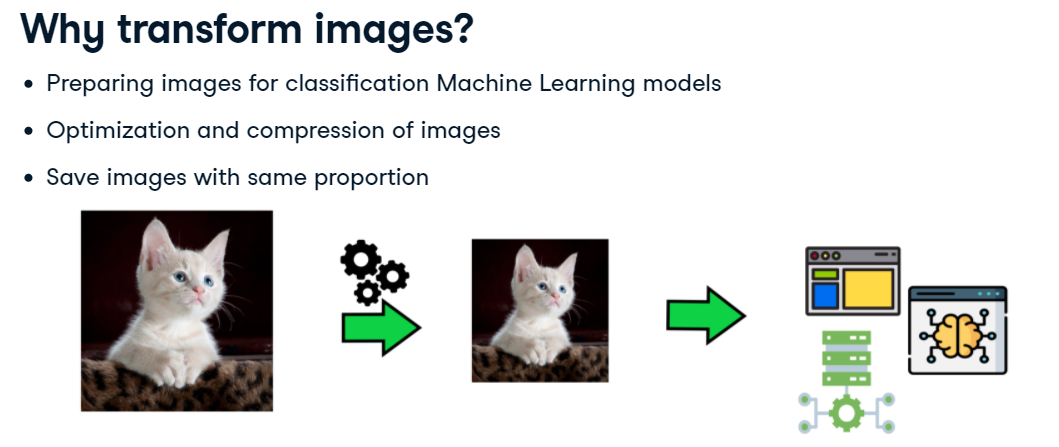

We have flipped images before using Numpy. Rotating images allows us to apply angles, like when you rotate an image 90 degrees, clockwise. Meaning, to the right.

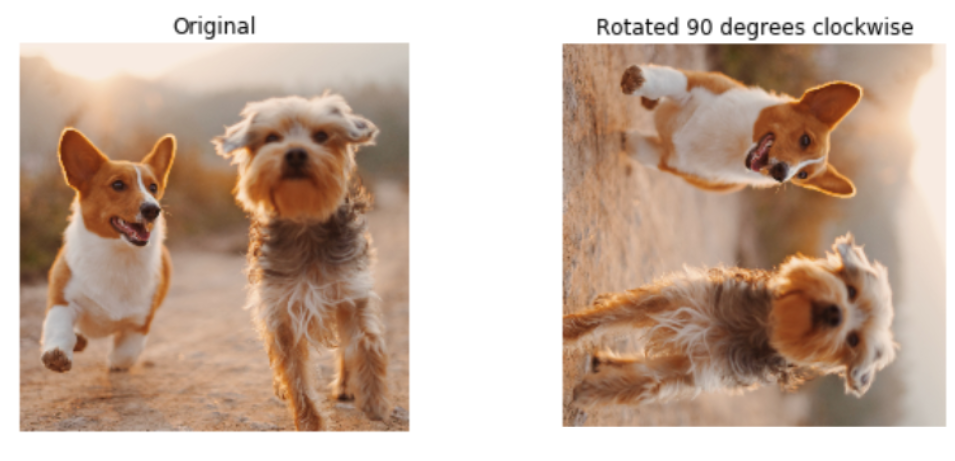

Or like when you rotate images 90 degrees anticlockwise, meaning, to the left. Like we see in this example image.

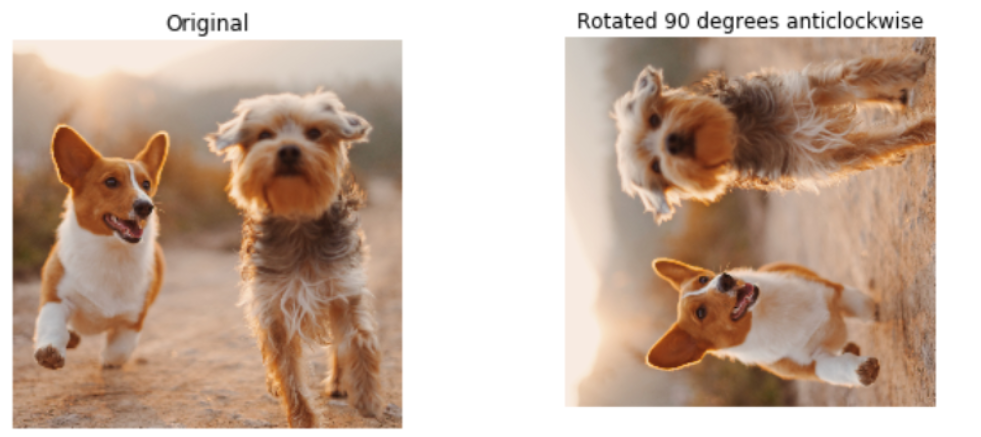

We can use the rotate function from scikit-image module "transform" to rotate an image by a certain angle around its center Once we import the module and function. In this code we are obtaining the rotated image with 90 degrees clockwise. The first parameter is the image we want to rotate and the second parameter is the angle. The rotation angle is in degrees in counter-clockwise or anticlockwise direction. So we use negative values. Here, you can see the original and rotated images.

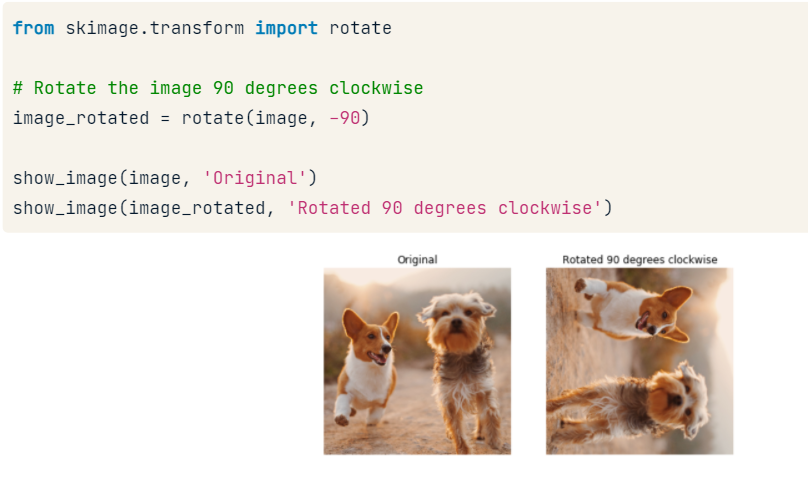

If we want to rotate anticlockwise, that is, to the left, we need to specify the degrees angles with positive numbers. In this case, we are rotating 90 degrees to the left. We see the original and the resulting images.

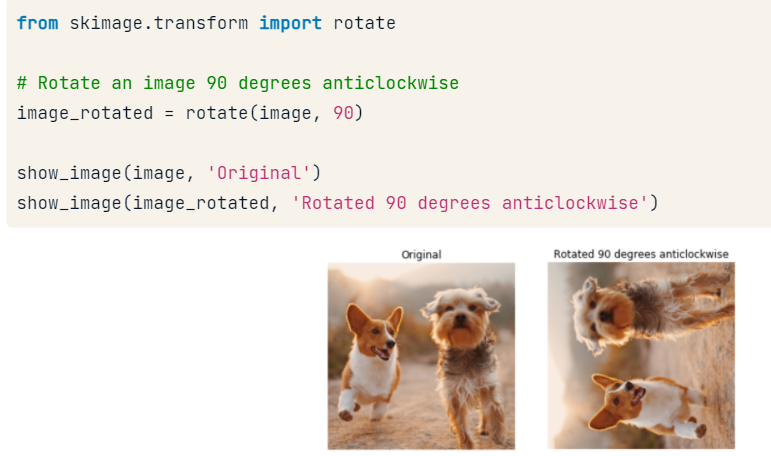

The rescale operation resizes an image by a given scaling factor. This can either be a single floating point value, or multiple values - one for each axis.

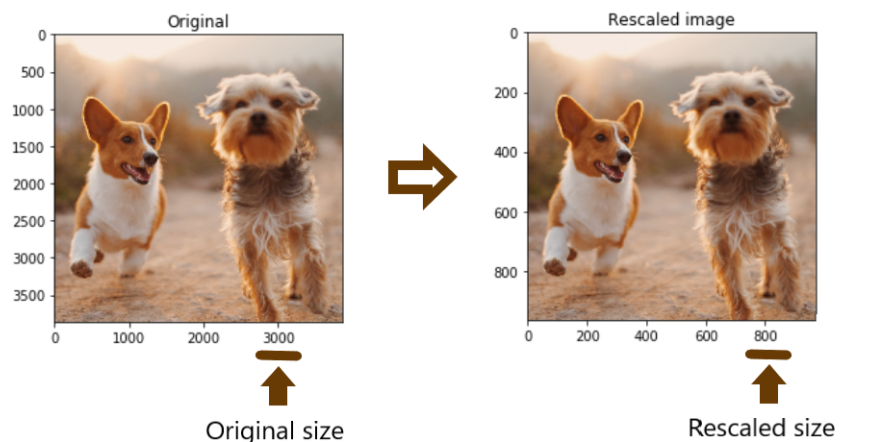

We can use the rescale function from the transform module. Once imported, in this example we make an image to be 4 times smaller than its original size by setting the scaling factor to 1/4. Setting an anti_aliasing boolean parameter to true specifies if applying a filter to smooth the image prior to down-scaling. We'll get into more detail later on. Then a multichannel if the image is colored.

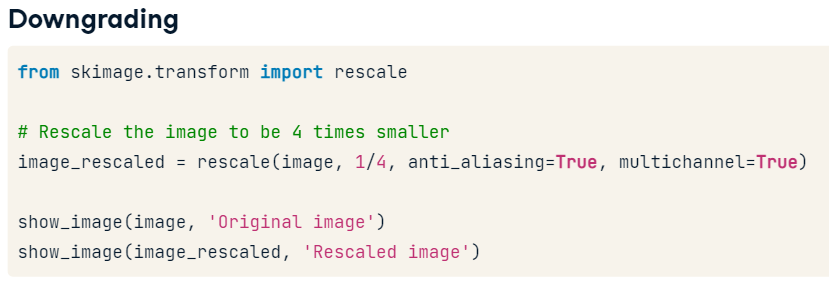

This way we will have a downgraded image. The one we are plotting.


In a digital image, aliasing is a pattern or a rippling effect. Aliasing makes the image look like it has waves or ripples radiating from a certain portion. 

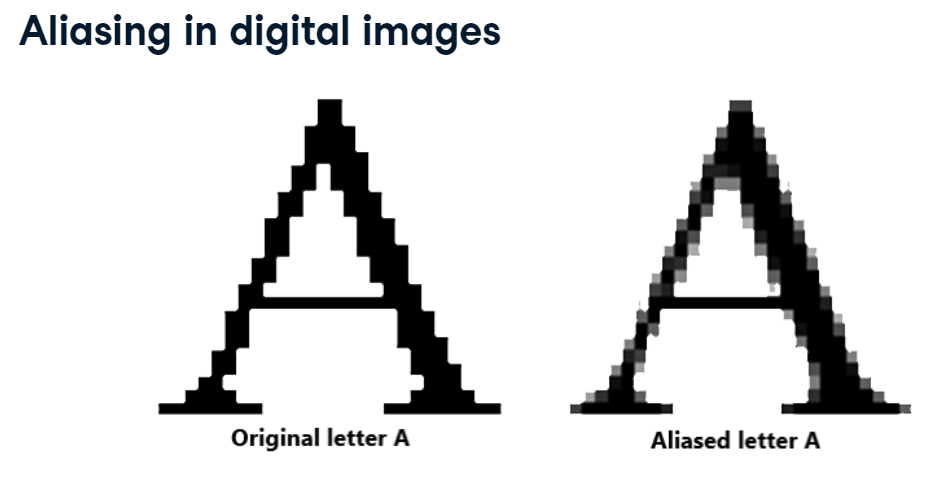

This happens because the pixelation of the image is poor; when they simply do not look right.

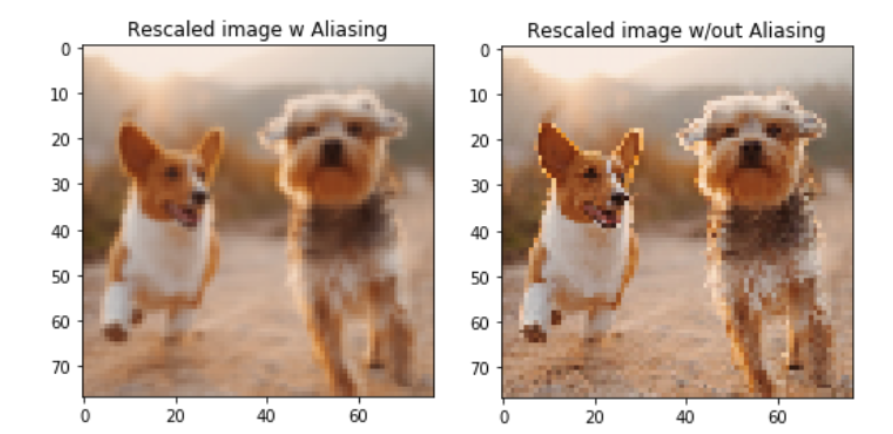

Here, we applied a resizing of 1/30, and we see what the anti_aliasing filter is doing to the image when is set. The first one has the anti_aliasing to True so we see is softer. While the one without it is pixelated.

Resizing is used for making images match a certain size. The same purpose as rescale, but allows to specify an output image shape instead of a scaling factor.

We can use the resize function from the transform module. This function requires the original image as the first parameter and a tuple holding the desired height and width to resize the image. Optionally, we can also set the anti-aliasing method.

We can see how the image has been resized to a height of 400 and a width of 600.

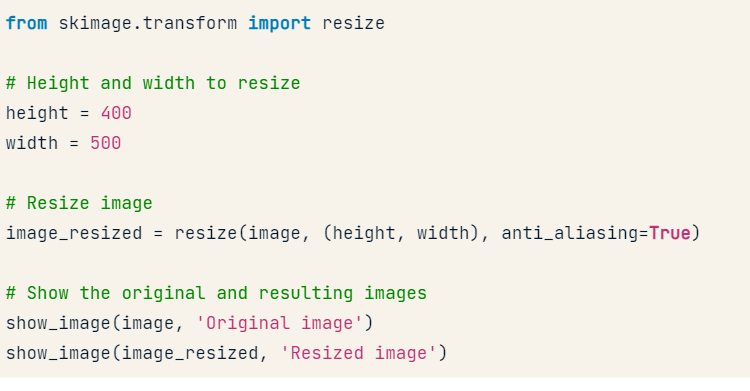
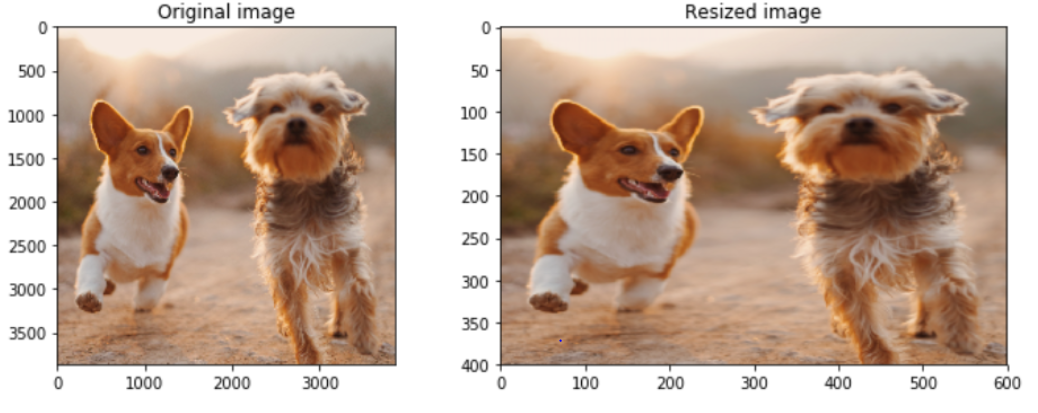

If we want to avoid disproportionate dimensions, we can resize an image proportionally. By taking the original width size of the image and dividing it by the scaling factor. The same goes for the height. Here we resize the image to be proportionally 4 times smaller.


We obtain a good looking and proportionally accurate resizing.

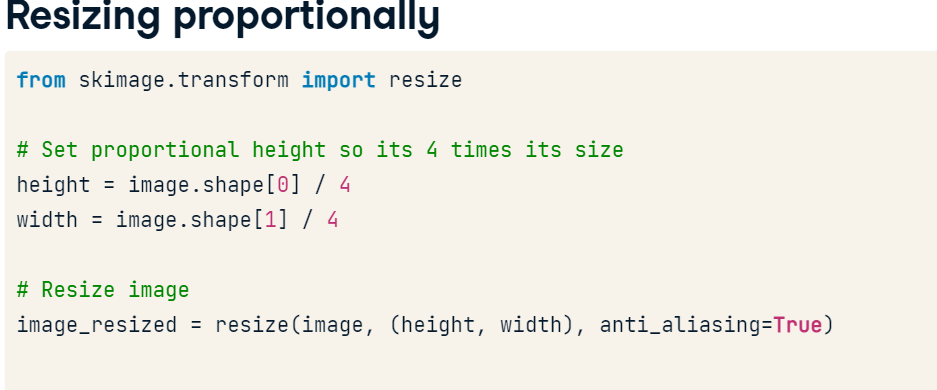
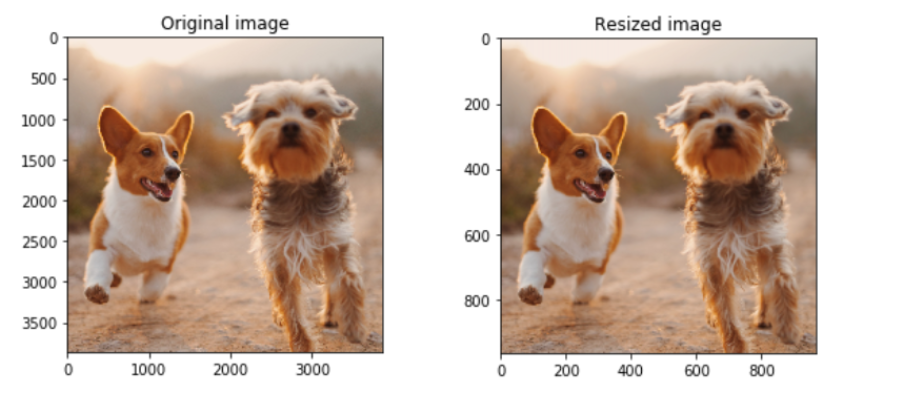

### Aliasing, rotating and rescaling
Let's look at the impact of aliasing on images.

Remember that aliasing is an effect that causes different signals, in this case pixels, to become indistinguishable or distorted.
You'll make this cat image upright by rotating it 90 degrees and then rescaling it two times. Once with the anti aliasing filter applied before rescaling and a second time without it, so you can compare them.

![cat](./images/image_cat.jpg)

In [2]:
from skimage.transform import rotate, rescale
import numpy as np
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

image_cat = plt.imread('./images/image_cat.jpg')

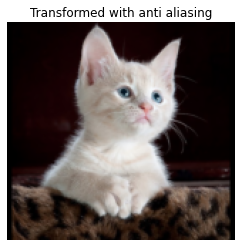

In [3]:
# Rotate the image 90 degress clockwise
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the anti-aliased image
show_image(rescaled_with_aa, 'Transformed with anti aliasing')

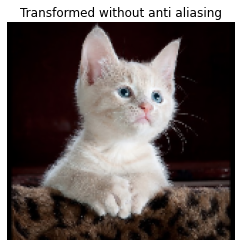

In [4]:
# Show the image without anti-aliasing
show_image(rescaled_without_aa, 'Transformed without anti aliasing')

We rotated and rescaled the image. Seems like the anti aliasing filter prevents the poor pixelation effect to happen, making it look better but also less sharp.


### Enlarging images
Have you ever tried resizing an image to make it larger? This usually results in loss of quality, with the enlarged image looking blurry.

The good news is that the algorithm used by scikit-image works very well for enlarging images up to a certain point.

In this exercise we'll enlarge an image three times!!

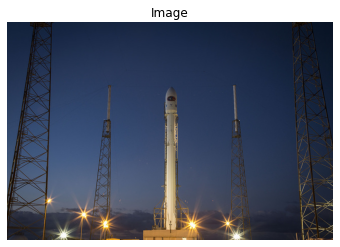

In [8]:
from skimage.transform import rescale
from skimage import data,io
# Load the image from data
ps_mage = io.imread('./images/rocket.png')
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)

# Show the original image
show_image(rocket_image)

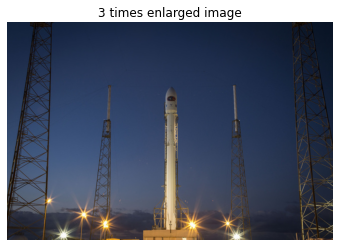

In [9]:
# Show the resulting image
show_image(enlarged_rocket_image, '3 times enlarged image')

### Proportionally resizing
We want to downscale the images of a veterinary blog website so all of them have the same compressed size.

It's important that you do this proportionally, meaning that these are not distorted.

First, you'll try it out for one image so you know what code to test later in the rest of the pictures.

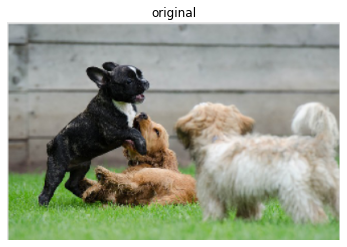

In [13]:
from skimage.transform import resize

dogs_banner = plt.imread('./images/banner.png')

# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width), anti_aliasing=True)

# Show the original image
show_image(dogs_banner, 'original')

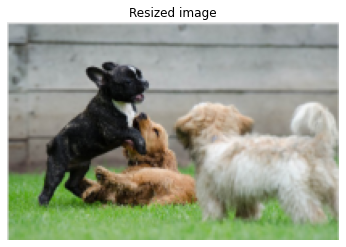

In [14]:
# Show the resulting image
show_image(image_resized, 'Resized image')

The image is now compressed and ready. We can use this code for future images that are uploaded to the website.